In [1]:
# Importing required libraries
import numpy as np  # For handling numbers and arrays (tables of data)
from math import sqrt  # To calculate square roots
from sklearn.metrics import mean_squared_error  # To measure how far off our predictions are
from matplotlib import pyplot as plt  # For drawing graphs

In [2]:
# Importing the machine learning tools from Keras
from keras.models import Sequential  # Helps us build a model one layer at a time
from keras.layers import Dense, LSTM  # The types of layers we'll use in the model

2025-05-03 23:17:22.081068: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-03 23:17:44.640850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-03 23:18:06.075560: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Step 1: Load the training, validation, and test data from CSV files
# These files contain the weather forecast inputs and solar energy outputs
# The original code used Windows paths. Here we use relative paths for compatibility with Jupyter
train_data = np.loadtxt("train_NREL_solar_data.csv", delimiter=',')
validate_data = np.loadtxt("validate_NREL_solar_data.csv", delimiter=',')
test_data = np.loadtxt("test_NREL_solar_data.csv", delimiter=',')

In [4]:
# Step 2: Split the data into inputs and outputs
# Inputs = weather conditions (first 9 columns), Output = solar irradiance (last column)
x_tr, t_tr = train_data[:, 0:9], train_data[:, -1]  # Training data
x_va, t_va = validate_data[:, 0:9], validate_data[:, -1]  # Validation data
x_te, t_te = test_data[:, 0:9], test_data[:, -1]  # Test data

In [5]:
# Step 3: Calculate the number of full days in each dataset
# Each "day" has 11 time steps (e.g., 11 hourly records)
Ndays_tr = x_tr.shape[0] // 11
Ndays_va = x_va.shape[0] // 11
Ndays_te = x_te.shape[0] // 11

In [6]:
# Step 4: Reshape the data so the model can understand it
# LSTM models expect input in the shape: [samples, time steps, features]
train_x = x_tr.reshape(Ndays_tr, 11, 9)
train_t = t_tr.reshape(Ndays_tr, 11, 1)

validate_x = x_va.reshape(Ndays_va, 11, 9)
validate_t = t_va.reshape(Ndays_va, 11, 1)

test_x = x_te.reshape(Ndays_te, 11, 9)
test_t = t_te.reshape(Ndays_te, 11, 1)

In [7]:
# Step 5: Build the LSTM model
model = Sequential()  # A basic model where we add one layer at a time

# Add an LSTM layer with 50 units
# This layer learns patterns in sequences over time
model.add(LSTM(50, input_shape=(11, 9), return_sequences=True))

# Add a Dense output layer that gives one prediction per time step
# Linear activation means it outputs a real number (not a category)
model.add(Dense(1, activation='linear'))

# Compile the model using Mean Squared Error (MSE) as the loss function
# The model will try to reduce this error during training
model.compile(loss='mse', optimizer='adam')

2025-05-03 23:18:25.182531: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-03 23:18:38.308751: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-03 23:18:38.308985: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [8]:
# Step 6: Train the model
# The model looks at the training data 100 times (100 epochs)
# It also checks how it performs on the validation data during training
history = model.fit(train_x, train_t, epochs=100, batch_size=50, validation_data=(validate_x, validate_t))

Epoch 1/100


2025-05-03 23:19:20.232457: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8903
2025-05-03 23:20:09.693680: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2df9a430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-05-03 23:20:09.693720: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-05-03 23:20:12.250208: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-03 23:20:17.594076: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


64/64 [==============================] - 64s 20ms/step - loss: 0.1683 - val_loss: 0.1079
Epoch 2/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0859 - val_loss: 0.0646
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0550 - val_loss: 0.0460
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0415 - val_loss: 0.0392
Epoch 5/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0357 - val_loss: 0.0343
Epoch 6/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0319 - val_loss: 0.0315
Epoch 7/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0295 - val_loss: 0.0303
Epoch 8/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0278 - val_loss: 0.0279
Epoch 9/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0265 - val_loss: 0.0261
Epoch 10/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0255 - val_loss: 0.0259
Epoch 11/100
64/64 

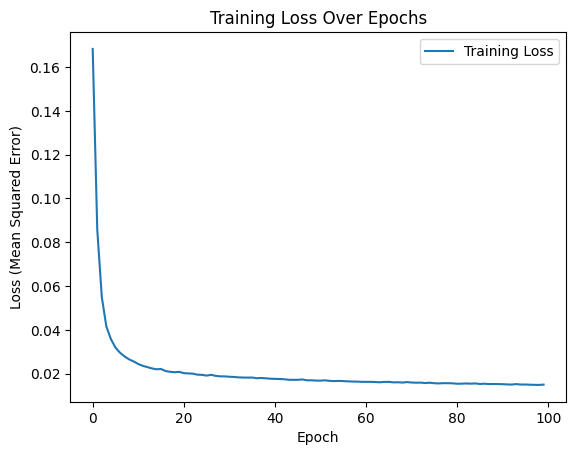

In [9]:
# Step 7: Plot the training loss to see how well the model learned
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (Mean Squared Error)")
plt.show()

In [10]:
# Step 8: Use the trained model to predict solar irradiance on the test data
yhat = model.predict(test_x)

12/12 [==============================] - 0s 2ms/step


In [11]:
# Step 9: Reshape the predictions into a flat list for comparison
y_te = yhat.reshape(Ndays_te * 11,)

In [12]:
# Step 10: Calculate RMSE (Root Mean Squared Error) to measure accuracy
# The lower the RMSE, the better the model's performance
rmse2 = mean_squared_error(y_te, t_te) * Ndays_te * 11
rmse = sqrt(rmse2 / 4026) * 1087.4396 / 2  # Scaling as used in the original study
print('Test RMSE: %.3f' % rmse)

Test RMSE: 81.803


In [13]:
# STEP 11 - Load the CSV files and check for missing values using NumPy

import numpy as np  # Make sure this is already imported earlier

# Load the CSVs (assuming no headers and same structure)
train_data = np.loadtxt('train_NREL_solar_data.csv', delimiter=',')
validate_data = np.loadtxt('validate_NREL_solar_data.csv', delimiter=',')
test_data = np.loadtxt('test_NREL_solar_data.csv', delimiter=',')

# Preview the training data
print("Preview of training data (first 5 rows):")
print(train_data[:5])

# Check for missing values in training data
print("\nMissing values in training data (per column):")
print(np.isnan(train_data).sum(axis=0))

Preview of training data (first 5 rows):
[[-1.        -1.        -1.         0.06282   -0.26935   -0.9264
  -0.97492   -0.70766   -0.64729   -0.97184  ]
 [-1.        -1.        -0.8        0.039688  -0.39452    0.08845
  -0.63795   -0.19087   -0.60962   -0.79833  ]
 [-1.        -1.        -0.6       -0.040085  -0.48737   -0.0062713
  -0.45479    0.13217   -0.5588    -0.66802  ]
 [-1.        -1.        -0.4       -0.07207   -0.55908   -0.84224
  -0.88416    0.013062  -0.53212   -0.26493  ]
 [-1.        -1.        -0.2       -0.089554  -0.60163   -0.90396
  -0.93597   -0.23364   -0.51276   -0.068839 ]]

Missing values in training data (per column):
[0 0 0 0 0 0 0 0 0 0]


In [14]:
import numpy as np

# STEP 12 - Reshape the data into sequences for CNN-LSTM
def create_sequences(data, time_steps):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :])     # Input window
        y.append(data[i+time_steps, -1])      # Target value
    return np.array(X), np.array(y)

# Set how many time steps to look back
time_steps = 10

# Apply to the training dataset
X_train, y_train = create_sequences(train_data, time_steps)

# Check the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (35135, 10, 10)
y_train shape: (35135,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense

# STEP 12.1 - Define the CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# STEP 12.2 - Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# STEP 12.3 - Train the model (use fewer epochs if you're testing)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
1098/1098 [==============================] - 30s 12ms/step - loss: 0.0468
Epoch 2/10
1098/1098 [==============================] - 13s 12ms/step - loss: 0.0365
Epoch 3/10
1098/1098 [==============================] - 13s 12ms/step - loss: 0.0356
Epoch 4/10
1098/1098 [==============================] - 13s 12ms/step - loss: 0.0349
Epoch 5/10
1098/1098 [==============================] - 13s 12ms/step - loss: 0.0345
Epoch 6/10
1098/1098 [==============================] - 13s 12ms/step - loss: 0.0342
Epoch 7/10
1098/1098 [==============================] - 13s 12ms/step - loss: 0.0339
Epoch 8/10
1098/1098 [==============================] - 13s 12ms/step - loss: 0.0336
Epoch 9/10
1098/1098 [==============================] - 13s 12ms/step - loss: 0.0334
Epoch 10/10
1098/1098 [==============================] - 13s 12ms/step - loss: 0.0333


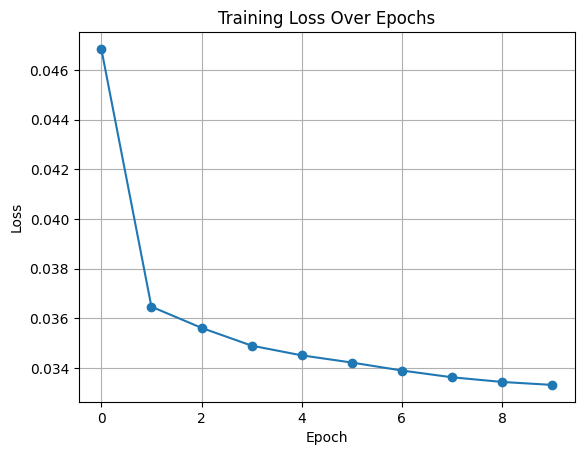

In [16]:
import matplotlib.pyplot as plt

# STEP 13 - Plot the training loss over epochs
plt.plot(history.history['loss'], marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [17]:
# STEP 14: Load and scale the data using NumPy only
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load CSVs using NumPy (assuming no headers)
train_data = np.loadtxt('train_NREL_solar_data.csv', delimiter=',')
validate_data = np.loadtxt('validate_NREL_solar_data.csv', delimiter=',')
test_data = np.loadtxt('test_NREL_solar_data.csv', delimiter=',')

# Scale all datasets using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
validate_data = scaler.transform(validate_data)
test_data = scaler.transform(test_data)

# Preview the first 5 rows of the scaled training data
print("Training data after scaling (first 5 rows):")
print(train_data[:5])

Training data after scaling (first 5 rows):
[[0.         0.         0.         0.53141    0.365325   0.0368
  0.01254    0.14617    0.176355   0.01408   ]
 [0.         0.         0.1        0.519844   0.30274    0.544225
  0.181025   0.404565   0.19519    0.100835  ]
 [0.         0.         0.2        0.4799575  0.256315   0.49686435
  0.272605   0.566085   0.2206     0.16599   ]
 [0.         0.         0.3        0.463965   0.22046    0.07888
  0.05792    0.506531   0.23394    0.367535  ]
 [0.         0.         0.4        0.455223   0.199185   0.04802
  0.032015   0.38318    0.24362    0.4655805 ]]


In [18]:
# STEP 15: Reshape into sequences
import numpy as np

def create_sequences(data, time_steps):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps, -1])  # # Save the trained CNN-LSTM model to disk for future reuse
    
    return np.array(X), np.array(y)

# Set time step size
time_steps = 10

# Create sequences
X_train, y_train = create_sequences(train_data, time_steps)
X_val, y_val = create_sequences(validate_data, time_steps)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (35135, 10, 10)
y_train shape: (35135,)
X_val shape: (3961, 10, 10)
y_val shape: (3961,)


In [19]:
# STEP 16: Build CNN-LSTM Model
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100, batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
1098/1098 [==============================] - 16s 13ms/step - loss: 0.0120 - val_loss: 0.0091
Epoch 2/100
1098/1098 [==============================] - 14s 13ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 3/100
1098/1098 [==============================] - 13s 12ms/step - loss: 0.0087 - val_loss: 0.0092
Epoch 4/100
1098/1098 [==============================] - 13s 12ms/step - loss: 0.0087 - val_loss: 0.0090
Epoch 5/100
1098/1098 [==============================] - 13s 12ms/step - loss: 0.0086 - val_loss: 0.0089
Epoch 6/100
1098/1098 [==============================] - 14s 12ms/step - loss: 0.0086 - val_loss: 0.0095
Epoch 7/100
1098/1098 [==============================] - 13s 12ms/step - loss: 0.0085 - val_loss: 0.0089
Epoch 8/100
1098/1098 [==============================] - 13s 12ms/step - loss: 0.0085 - val_loss: 0.0091
Epoch 9/100
1098/1098 [==============================] - 14s 12ms/step - loss: 0.0084 - val_loss: 0.0091
Epoch 10/100
1098/1098 [==============================]

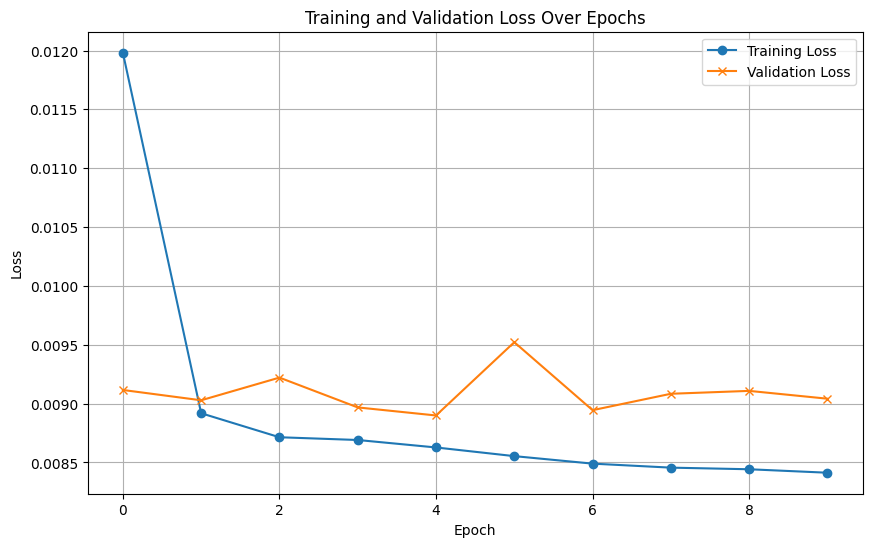

In [20]:
import matplotlib.pyplot as plt

# STEP 17: Visualise Model Learning Over Time

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

124/124 [==============================] - 0s 2ms/step


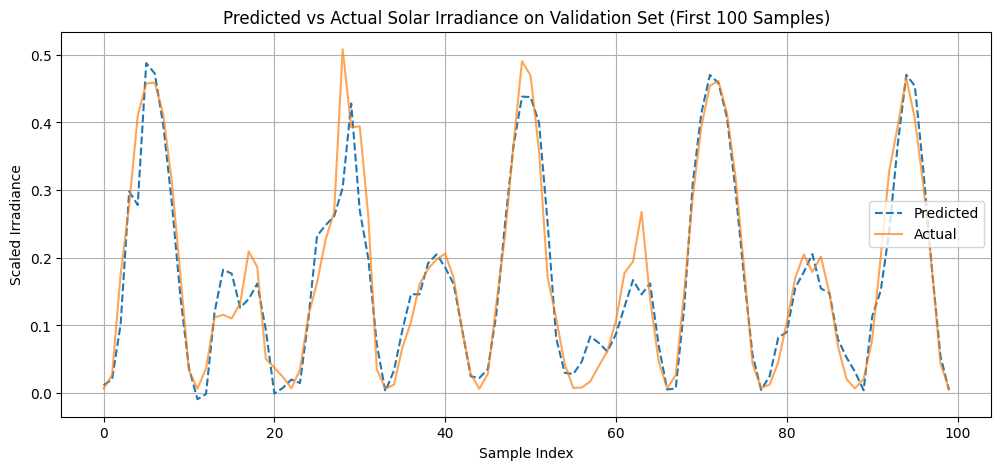

In [36]:
# Predict on validation set
predictions = model.predict(X_val)

# Step 18: Plot first 100 predictions vs actual values
plt.figure(figsize=(12,5))
plt.plot(predictions[:100], label='Predicted', linestyle='--')
plt.plot(y_val[:100], label='Actual', alpha=0.7)
plt.title('Predicted vs Actual Solar Irradiance on Validation Set (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Scaled Irradiance')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# STEP 19: Save the trained CNN-LSTM model to disk for future reuse
model.save('cnn_lstm_solar_model.h5')

/usr/local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
# STEP 20: Reuse your sequence function and prepare test set sequences using NumPy only

# Sequence creation function using NumPy slicing
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :])       # All features in the window
        y.append(data[i+time_steps, -1])        # Target = irradiance column at next step
    return np.array(X), np.array(y)

# Load and scale the test data using NumPy
test_data_raw = np.loadtxt('test_NREL_solar_data.csv', delimiter=',')
scaler = MinMaxScaler()
test_data = scaler.fit_transform(test_data_raw)  # Fit just for testing

# Prepare test sequences for model input
time_steps = 10
X_test, y_test = create_sequences(test_data, time_steps)

In [31]:
# STEP 21: Load the trained model (if not in memory)
from tensorflow.keras.models import load_model
model = load_model('cnn_lstm_solar_model.h5')

In [32]:
# STEP 22: Predict on test set
predictions_test = model.predict(X_test)

126/126 [==============================] - 0s 2ms/step


In [33]:
# STEP 23: Evaluate model using RMSE
rmse_test = sqrt(mean_squared_error(y_test, predictions_test))
print(f"Test RMSE: {rmse_test:.4f}")

Test RMSE: 0.0964


In [34]:
# STEP 24: Calculate and print RMSE on test set
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, predictions_test))
print(f"Test RMSE: {rmse:.4f}")

Test RMSE: 0.0964


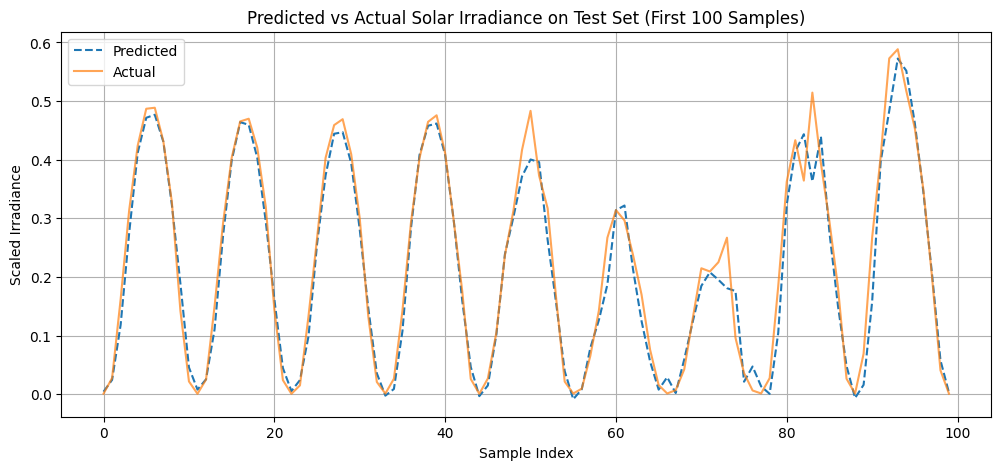

In [35]:
# STEP 25: Plot predictions vs actual values
plt.figure(figsize=(12,5))
plt.plot(predictions_test[:100], label='Predicted', linestyle='--')
plt.plot(y_test[:1›00], label='Actual', alpha=0.7)
plt.title('Predicted vs Actual Solar Irradiance on Test Set (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Scaled Irradiance')
plt.legend()
plt.grid(True)
plt.show()